# AN ANALYSIS TO IDENTIFY THE PEAK HOURS: ASK HN AND SHOW HN POSTS

# Project Description
    Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result. We are mostly concerned with posts of `Ask HN` where the user is asking the platform a question and `Show HN` where the user is showcasing something they made or something that they find interesting on the platform.
    
    
# Project Objectives
    This project aims to:
        - Identify which posts between `Ask HN` and `Show HN` are more likely to be posted
        - Analyze which time of the day that a user posting will receive a comment
        - Pinpoint the peak hours where most users are posting and commenting.

The following are an example posts title for `Ask HN` and `Show HN`:

Ask HN: How to improve my personal website?<br>
Ask HN: Am I the only one outraged by Twitter shutting down share counts?<br>
Ask HN: Aby recent changes to CSS that broke mobile?

Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'<br>
Show HN: Something pointless I made<br>
Show HN: Shanhu.io, a programming playground powered by e8vm

Sources: 
<br>[Hacker news](https://news.ycombinator.com/)<br>
[Kaggle](https://www.kaggle.com/hacker-news/hacker-news-posts)<br>
[DataQuest](https://www.dataquest.io/)

---

# Introduction

Before we begin our analysis, we are going to create a function that will open, read and save the csv file in a variable named `hn`. We will also create a function that we can use for initial exploration of the dataset. And lastly we are going to import the `modules` that we are going to use on this project.

In [1]:
def dataset_csv(dataset, header = True):
    '''
    Open and reads the csv file
    
    Parameter
    ---
    dataset: str
        A string type in the format of 'example.csv'
    header: bool, default = True
        While true, the result will include a header, otherwise it will return the rows only   
    Return
    ---
    A list of lists
    '''
    
    from csv import reader
    
    file = open(dataset)
    read = reader(file)
    data = list(read)
    
    if header:
        return data
    if not header:
        return data[1:]

def explore_data(dataset, start, end, rows_and_columns = True):
    '''
    Prints out an initial exploration of the data
    
    Parameter
    ---
    dataset: list
        A variable of the dataset
    start: int
        The starting index to be shown
    end: int
        The ending index to be shown
    rows_and_columns: bool, default = True
        While true, it will show the total number of rows and columns of the dataset
    Return
    ---
    A print statement of the above parameters
    '''
    print('Sample {0} no. rows'.format(len(dataset[start:end])))
    print('')
    
    for row in dataset[start:end]:
        print(row)
        print('')
    if rows_and_columns:
        print('Total number of columns: {0}\nTotal number of rows: {1}'.format(len(dataset[0]),len(dataset[1:])))
    

In [2]:
import datetime as dt # Since we are going to deal with the hours later on in our analysis, we are going to need the datetime module
from matplotlib import pyplot as plt # We are going to represent our data in a graph later on in our analysis to derive a meaning from the data

<br>The function named `dataset_csv()` will be used to open the hacker news dataset. We will keep the *header* argument as true since we want to see what our headers are. But we are going to create a separate variable for the headers and the rows.

In [3]:
hn = dataset_csv(r'C:\Users\Mico\OneDrive\Desktop\DATASETS\KAGGLE\HACKER NEWS POST\DATAQUEST\hacker_news.csv')
hn_header = hn[0] # this will extract the header from the hn dataset
hn_rows = hn[1:] # this will exclude the header from the hn dataset

---

# Initial Data Exploration
To begin our data analysis, we will first have an initial data exploration in order to have an insight on what are the contents of our dataset.
In this section we are going to do the following:
- Use the `explore_data()` to display the initial overview of the dataset. 
    - Inputting the **start** as **0** to show the headers.
    - The **end** as **5** to return the first five rows.
    - And keeping the argument of the **rows_and_columns** as the default **True** to see how many columns and rows are in the dataset.
- Describe the individual attributes.

### Data Exploration

In [4]:
explore_data(hn,0,5)

Sample 5 no. rows

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']

Total number of columns: 7
Total number of rows: 20100


<br>The data above shows the **7 attributes** of each rows which are described in the table below.

### Attributes Description<a id='table_cell'></a>

|Index|Columns|Description|Ideal Data Type|
|:---:|:---:|:---:|:---:|
|0|id|The unique identifier from the hacker news post|str|
|1|Title|Title of the post|str|
|2|url|Url of the item being linked to|str|
|3|num_points|The number of upvotes the post received|int|
|4|num_comments|The number of the comments the post received|int|
|5|author|The name of the account that made the post|str|
|6|created_at|The date and time the post was made (Timezone: Eastern Time in the US)|datetime|

**Original dataset source:** [Kaggle - Hacker News Posts](https://www.kaggle.com/hacker-news/hacker-news-posts)<br>
**Date created:** 2016-09-27<br>
**Date updated:** 2016-09-27<br>
**Source used in this analysis:** DataQuest - Guided Project: Exploring Hacker News Posts<br>
**Note:** The dataset from kaggle contains more than 300,000 rows while the dataset from this analysis contains 20,101 rows. The dataset was reduced by removing submissions that did not received any comments, and then randomly sampling from the remaining submissions.<br>

---

# Data Cleaning

As we've mentioned we're only concern with the posts that have a beginning title of `Ask HN` or `Show HN`. In this section we are going to do the following:
- Since `Ask HM` amd `Show HN` are in the **title** column. We will verify if there's any missing value in this column.
- Create a list of lists that contains `Ask HN` or `Show HN` in the beginning of the title.

### Dataset Verification

In order to determine the usesability of our dataset, we have to check whether there's a missing value and identify how it will affect our analysis.

In [5]:
def missing_data(dataset,index):
    '''
    Count the rows with a missing value ('')
    
    Parameter
    ---
    dataset: list
        A variable of the dataset
    index: int
        The index value of the column to be iterated
    Return
    ---
        Statement of the number of rows with missing value
    '''
    
    missing_column = list()
    
    for row in dataset:
        if len(row) != len(hn_header): # This is to check if there's a row that contains missing data
            missing_column.append(row)
        elif row[index] == '': # This is to check if there's a row with an empty `created_at`
            missing_column.append(row)
    return 'The number of rows with missing data is {0}.'.format(len(missing_column))

In [6]:
for columns in range(7):
    print('Column -',hn_header[columns],', Index - ',columns)
    print(missing_data(hn_rows,columns))
    print('')

Column - id , Index -  0
The number of rows with missing data is 0.

Column - title , Index -  1
The number of rows with missing data is 0.

Column - url , Index -  2
The number of rows with missing data is 2440.

Column - num_points , Index -  3
The number of rows with missing data is 0.

Column - num_comments , Index -  4
The number of rows with missing data is 0.

Column - author , Index -  5
The number of rows with missing data is 0.

Column - created_at , Index -  6
The number of rows with missing data is 0.



As we've investigated the only column that contains a missing value *('')* is `url` which is not our concern since it is only a url where the item is being linked to.

### Datatype Conversion

Data useability is an integral part of our analysis. We have to make sure that the types data we are using is in compliance with our data requirements. As we have shown on the table above **[Attributes Description](#table_cell)** we have an ideal data type for each of our column. In the following below, we are going to check the data types of each columns and convert that column whenever the data type doesn't meet our **[data requirements](#table_cell)**.

In [7]:
for element in range(7):
    print('Column -',hn_header[element],', Index - ',element)
    print(type(hn_rows[1][element]))
    print('')

Column - id , Index -  0
<class 'str'>

Column - title , Index -  1
<class 'str'>

Column - url , Index -  2
<class 'str'>

Column - num_points , Index -  3
<class 'str'>

Column - num_comments , Index -  4
<class 'str'>

Column - author , Index -  5
<class 'str'>

Column - created_at , Index -  6
<class 'str'>



As we can see, the  following columns does not meet our **[data requirements](#table_cell)**.
- **num_points** , Index -  3
    - Since this column represents the total number of up votes after subtracting the number of down votes. This should have a data type of `integer`.
- **num_comments** , Index -  4
    - Since this column represents the total number of comments. This should have a data type of `integer`.
- **created_at** , Index -  6
    - Since this column represents the date and time the post was made. This should have a data type of `datetime`.
    
In order to comply, we have to convert these three columns on their corresponding data types.

In [8]:
def convert_data(dataset,index,type_of_data):
    
    import datetime as dt
    
    for rows in dataset:
        convert_data = rows[index]
        
        if type_of_data == 'datetime':
            convert_to = dt.datetime.strptime(convert_data,'%m/%d/%Y %H:%M')
        elif type_of_data == int:           
            convert_to = int(convert_data)
        
        rows[index] = convert_to

In [9]:
# To convert the `num_points` 
convert_data(hn_rows,3,int)
convert_data(hn_rows,4,int)
convert_data(hn_rows,6,'datetime')

# To verify the changes that we've made. We will iterate on one of the rows in our dataset.

for element in range(7):
    print('Column -',hn_header[element],', Index - ',element)
    print(type(hn_rows[1][element]))
    print('')

Column - id , Index -  0
<class 'str'>

Column - title , Index -  1
<class 'str'>

Column - url , Index -  2
<class 'str'>

Column - num_points , Index -  3
<class 'int'>

Column - num_comments , Index -  4
<class 'int'>

Column - author , Index -  5
<class 'str'>

Column - created_at , Index -  6
<class 'datetime.datetime'>



Now that we are complying with our **[data requirements](#table_cell)** we can procede to segregate our dataset. Remember that we are interested at `Ask HN` and `Show HN` posts to analyze whether the date and time of posting affects the number of average comments.

### Dataset Segregation

In order to derive a meaning from our dataset, we're going to create a sperate lists of the following:
- Posts that starts with Ask HN
- Posts that starts with Show HN
- Other posts

Even though our concern are the posts that contains `Ask HN` and `Show HN` we will still create a separate list for `Other posts` for comparison purposes further down in our analysis.

In [10]:
ask_post = list()
show_post = list()
other_post = list()

for row in hn_rows:
    title = row[1].lower() # Since there might be posts that contains `ask HN` and `show HN` rather than `Ask HN` and `Show HN`, we will convert all our title into lower cases and iterate by using `ask hn` and `show hn`
    if title.startswith('ask hn'):
        ask_post.append(row)
    elif title.startswith('show hn'):
        show_post.append(row)
    else:
        other_post.append(row)
        
# We'll print out the first 3 rows of each list

print('Posts that starts with Ask HN:')
explore_data(ask_post,0,3)
print('\n')
print('Posts that starts with Show HN:')
explore_data(show_post,0,3)
print('\n')
print('Other posts:')
explore_data(other_post,0,3)

Posts that starts with Ask HN:
Sample 3 no. rows

['12296411', 'Ask HN: How to improve my personal website?', '', 2, 6, 'ahmedbaracat', datetime.datetime(2016, 8, 16, 9, 55)]

['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', 28, 29, 'tkfx', datetime.datetime(2015, 11, 22, 13, 43)]

['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', 1, 1, 'polskibus', datetime.datetime(2016, 5, 2, 10, 14)]

Total number of columns: 7
Total number of rows: 1743


Posts that starts with Show HN:
Sample 3 no. rows

['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', 26, 22, 'kfihihc', datetime.datetime(2015, 11, 25, 14, 3)]

['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', 747, 102, 'dhotson', datetime.datetime(2015, 11, 29, 22, 46)]

['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', 1, 1, 'h8liu', d

<br>After segregating the dataset, we can see that *approximately* **14%** of the dataset contains posts that start swith either `Ask HN` or `Show HN`. Now that we have a separate dataset we can procede with the data analysis.


---

# Data Analysis

Now that we got a clean set of data, we are going to analyze it to gain an information to drive our conclusion and recommendations. In this section we are going to do the following:
- Get the average comments made on each segreted data that we created above. And decide which data to focus on.
- Create a frequency table for the numbers of comments made and posts created by the hour.
- Create a line graph of the folliwng:
    - Posts created by hour
    - Comments made by hour
    - Average comments made per posts created
- Analyze the hours that has an above average comments made.

In [11]:
def total_column(dataset, index):
    '''
    Summation of the emtire column given that the data is int
    
    Parameter
    ---
    dataset: list
        A variable of the dataset
    index: int
        The index number of the column to be iterated
    Return
    ---
        Single integer value
    '''
    
    total = 0
    
    for row in dataset:
        total_column = row[index]
        total += total_column
        
    average = round((total / (len(dataset))),2)
    
    return total, average

In [12]:
ask_posts_comments, show_posts_comments, other_posts_comments = total_column(ask_post,4), total_column(show_post,4),total_column(other_post,4)
print('ask_post dataset:')
print('The total number of comments is {0} wtih the average {1} number of comments'.format(ask_posts_comments[0],ask_posts_comments[1]))
print('\n')
print('show_post dataset:')
print('The total number of comments is {0} wtih the average {1} number of comments'.format(show_posts_comments[0],show_posts_comments[1]))
print('\n')
print('other_post dataset:')
print('The total number of comments is {0} wtih the average {1} number of comments'.format(other_posts_comments[0],other_posts_comments[1]))

ask_post dataset:
The total number of comments is 24483 wtih the average 14.04 number of comments


show_post dataset:
The total number of comments is 11988 wtih the average 10.32 number of comments


other_post dataset:
The total number of comments is 462055 wtih the average 26.87 number of comments


<br>We can observe that on average `Ask HN` posts has a higher number of comments compared to `Show HN` posts. And other related posts have much larger number of people that commented on those posts.

Since `Ask HN` posts are more likely to receive comments with an average of **14.04**<a id='average'></a> comments, we'll focus our analysis just on these posts. But a further analysis about `Show HN` and other posts is recommended to be studied outside this project to further give a concrete support on our conclusion and recommendations. 

We will start our analysis by look at the first five rows of our `Ask HN` dataset that we segregated. And at the same time we are going to extract the number of comments and date and time created in order to show a frequency of the following:
- Posts created by the hour of the day
- Comments made by the hour of the day

In [13]:
print('Ask HN dataset:')
print('')
explore_data(ask_post,0,5)

result_list = list()

for row in ask_post:
    result = row[6], row[4]
    result_list.append(result)
print('\n')
print('Extracted date and time created and number of comments by the hour')
print('')
explore_data(result_list,0,3,rows_and_columns = False)

Ask HN dataset:

Sample 5 no. rows

['12296411', 'Ask HN: How to improve my personal website?', '', 2, 6, 'ahmedbaracat', datetime.datetime(2016, 8, 16, 9, 55)]

['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', 28, 29, 'tkfx', datetime.datetime(2015, 11, 22, 13, 43)]

['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', 1, 1, 'polskibus', datetime.datetime(2016, 5, 2, 10, 14)]

['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', 1, 3, 'sph130', datetime.datetime(2016, 8, 2, 14, 20)]

['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', 28, 17, 'roykolak', datetime.datetime(2015, 10, 15, 16, 38)]

Total number of columns: 7
Total number of rows: 1743


Extracted date and time created and number of comments by the hour

Sample 3 no. rows

(datetime.datetime(2016, 8, 16, 9, 55), 6)

(datetime.datetime(2015, 11, 22, 13, 43), 29)

(datetime.datetime(2016, 5, 2, 10, 14), 1)


Now that we have a list of tuples containing the attributes `created_at` and `num_comments` we are going to create the frequency table for both of these attributes. The frequency tables will take in the hour per day in a 24 hour format as a key and posts created and comments made on those hour as the values.

So we will have two frequency table:
1. Hour of the day by the number of posts created
2. Hour of the day by the number of comments made

In [14]:
counts_by_hour = dict()
comments_by_hour = dict()

for row in result_list:
    hour = row[0].time().hour
    counts_by_hour[hour] = counts_by_hour.get(hour, 0)+1
    if hour not in comments_by_hour:
        comments_by_hour[hour] = row[1]
    elif hour in comments_by_hour:
        comments_by_hour[hour] += row[1]

In [15]:
print('Number of posts created by the hour of the day:')
print('Hour:Number of posts')
print(counts_by_hour)
print('\n')
print('Number of comments made by the hour of the day:')
print('Hour:Number of comments')
print(comments_by_hour)

Number of posts created by the hour of the day:
Hour:Number of posts
{9: 45, 13: 85, 10: 59, 14: 107, 16: 108, 23: 68, 12: 73, 17: 100, 15: 116, 21: 109, 20: 80, 2: 58, 18: 109, 3: 54, 5: 46, 19: 110, 1: 60, 22: 71, 8: 48, 4: 47, 0: 55, 6: 44, 7: 34, 11: 58}


Number of comments made by the hour of the day:
Hour:Number of comments
{9: 251, 13: 1253, 10: 793, 14: 1416, 16: 1814, 23: 543, 12: 687, 17: 1146, 15: 4477, 21: 1745, 20: 1722, 2: 1381, 18: 1439, 3: 421, 5: 464, 19: 1188, 1: 683, 22: 479, 8: 492, 4: 337, 0: 447, 6: 397, 7: 267, 11: 641}


Now, getting an insight on this frequency table is very confusing. A much better way of representing these numbers is by using a `line graph`. It is easier to derive a meaning from a line graph rather than looking at these numbers. In the below graphs, we are going to show the relationship of the hour of the day by the number of comments made and posts created.

In [16]:
# Since we are using a 24 hour time. We will create a list consisting of the values in our time. The purpose of this list is to label our x-axis which is the `hour` in our dataset.
hours_24 = [hour for hour in range(24)]

#### Posts created by hour

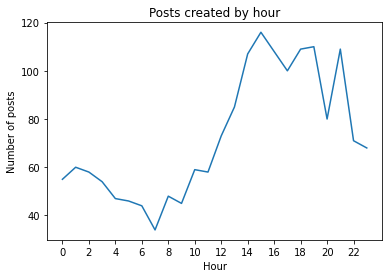

In [17]:
x = sorted(counts_by_hour.items(), key=lambda x: x[0])
plt.plot(*zip(*x))
plt.xlabel("Hour")
plt.ylabel("Number of posts")
plt.title('Posts created by hour')
plt.xticks(hours_24[::2])
plt.show()

As we can see there is a spike of posts being created by the afternoon up to the evening. We can see `three` peaks in our line graph, which all of them are in the afternoon and evening.

#### Comments made by hour

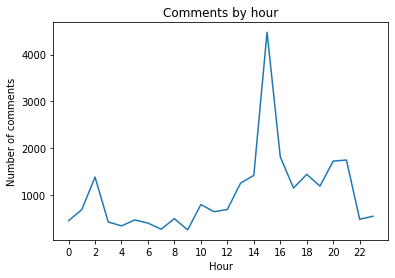

In [18]:
y=sorted(comments_by_hour.items(), key=lambda x: x[0])
plt.plot(*zip(*y))
plt.xlabel("Hour")
plt.ylabel("Number of comments")
plt.title('Comments by hour')
plt.xticks(hours_24[::2])
plt.show()

We can observe from the line graph above that there is a higher surge of comments being made by `15:00` or `3:00 PM`. And a lot less throughout the day.
<br>

Now that we have an insight on posts created and comments made by the hour. We are going to look at the average number of comments per posts by the hour. Following below, we are going to create a list of lists of the average comments per posts by the hour. Since we have already sorted out our dataset above, we can directly iterate on our two list two create the list of lists.

In [19]:
average_per_hour = list()
for i in range(24):
    posts = x[i][1] # Since we have a tupple of (hour,posts) we are going to extract the value by specifying the index [1]
    comments = y[i][1] # Since we have a tupple of (hour,comments) we are going to extract the value by specifying the index [1]
    average = round((comments/posts),2)
    average_by_hour = i, average
    average_per_hour.append(average_by_hour)

#### Average comments made per posts created

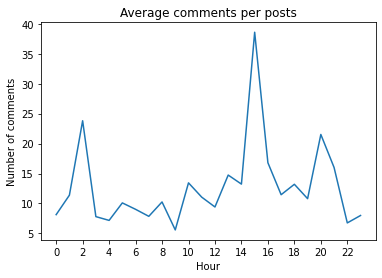

In [20]:
plt.plot(*zip(*average_per_hour))
plt.xlabel("Hour")
plt.ylabel("Number of comments")
plt.title('Average comments per posts')
plt.xticks(hours_24[::2])
plt.show()

As expected there is a spike of comments made per posts created on `13:00` or `3:00PM` but we can also observe that there is are peaks that happened on the morning and the evening. Remember that `Ask HN` data has an [**average 14.04 number of comments**](#average). So we can say that the times around `02:00` or `2:00 AM`, `13:00` or `3:00PM` and `20:00` or `8:00PM` are all above average.<a id='line_graph'></a>

In [21]:
sorted(average_per_hour, key=lambda x: x[1],reverse = True)

above_average_hours = list()
for hours in range(24):
    if average_per_hour[hours][1] > ask_posts_comments[1]:
        avg_per_hour = average_per_hour[hours][1]
        hours = average_per_hour[hours][0]
        total_avg = hours,avg_per_hour
        above_average_hours.append(total_avg)
        
top_above_avg_hours = sorted(above_average_hours,key = lambda x:x[1], reverse = True)

for hours in top_above_avg_hours:
    time = dt.time(hours[0])
    formatted_time = time.strftime('%H:%M')
    print('{0}: Average of {1} number of comments'.format(formatted_time,hours[1]))

15:00: Average of 38.59 number of comments
02:00: Average of 23.81 number of comments
20:00: Average of 21.52 number of comments
16:00: Average of 16.8 number of comments
21:00: Average of 16.01 number of comments
13:00: Average of 14.74 number of comments


We can see that the hours that has an above average of comments made per posts created corresponds with the [results of our line graph above](#line_graph).

---

# Conclusion and Recommendations

From the information that we extracted from our results, we can the **peak times** below where a user who created a posts are more likely to receive a comment:
1. 15:00 or 3:00 PM
2. 02:00 or 2:00 AM
3. 20:00 or 8:00 PM
4. 16:00 or 4:00 PM
5. 21:00 or 9:00 PM
6. 13:00 or 1:00 PM

**Note**: These timings are in **Eastern Time in the US**. 

The following times below are in `Qatar Timezone (GMT +3)`

1. 22:00 or 10:00 PM
2. 09:00 or 9:00 AM
3. 02:00 or 2:00 AM
4. 23:00 or 11:00 PM
5. 04:00 or 4:00 AM
6. 20:00 or 8:00 PM

And the following times below are in `Philippines Timezone (GMT +8)`

1. 03:00 or 3:00 AM
2. 14:00 or 2:00 PM
3. 07:00 or 7:00 AM
4. 04:00 or 4:00 AM
5. 09:00 or 9:00 AM
6. 13:00 or 1:00 AM

Even though these times **exceeds the average number of comments by posts created** we have to remember that we have only identified the times where it is more *more likely* to receive a comment on a topic relating to `Ask HN` posts. But *we cannot guarantee* that we will receive a comment for posting on these times.

Though due to the **high number of active people** on these times, we recommend to posT the `Ask HN` related posts by these hours.